In [17]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import pi

In [32]:
bottom = 0
height = 1.0
steepness = 0.5
initial_height = 0
bottom_width = 2
offset = pi / (2 * steepness) + bottom
slope_length = pi / steepness

In [33]:
def y(s):
    w = np.array(s)
    w_left, w_right = w[w <= bottom], w[w > bottom]
    y_left = height * np.sin(
        steepness * (np.clip(w_left, bottom - bottom_width / 2 - slope_length,
                                  bottom - bottom_width / 2) - (offset - bottom_width / 2))) + initial_height
    y_right = height * np.sin(
        steepness * (np.clip(w_right, bottom + bottom_width / 2,
                                  bottom + bottom_width / 2 + slope_length) - (offset + bottom_width / 2))) + initial_height
    return np.concatenate((y_left, y_right))

In [34]:
def y_dot(s):
    w = np.array(s)
    w_left, w_right = w[w <= bottom], w[w > bottom]
    y_left = height * steepness * np.cos(steepness * (w_left - (offset - bottom_width / 2)))
    y_right = height * steepness * np.cos(steepness * (w_right - (offset + bottom_width / 2)))
    y_left[w_left <= bottom - bottom_width / 2 - slope_length] = 0.0
    y_left[w_left >= bottom - bottom_width / 2] = 0.0
    y_right[w_right <= bottom + bottom_width / 2] = 0.0
    y_right[w_right >= bottom + bottom_width / 2 + slope_length] = 0.0
    return np.concatenate((y_left, y_right))

In [35]:
def y_dot_dot(s):
    w = np.array(s)
    w_left, w_right = w[w <= bottom], w[w > bottom]
    y_left = -height * steepness**2 * np.sin(steepness * (w_left - (offset - bottom_width / 2)))
    y_right = -height * steepness**2 * np.sin(steepness * (w_right - (offset + bottom_width / 2)))
    y_left[w_left <= bottom - bottom_width / 2 - slope_length] = 0.0
    y_left[w_left >= bottom - bottom_width / 2] = 0.0
    y_right[w_right <= bottom + bottom_width / 2] = 0.0
    y_right[w_right >= bottom + bottom_width / 2 + slope_length] = 0.0
    return np.concatenate((y_left, y_right))

In [36]:
xs = np.linspace(-4 * pi, 4 * pi, 1000)
ys = y(xs)
y_dots = y_dot(xs)
y_dot_dots = y_dot_dot(xs)

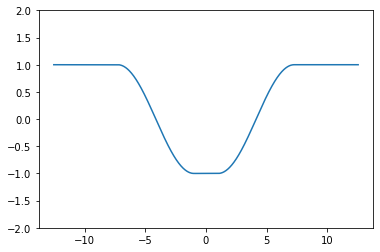

In [44]:
plt.ylim(-2, 2)
plt.plot(xs, ys, 'tab:blue')

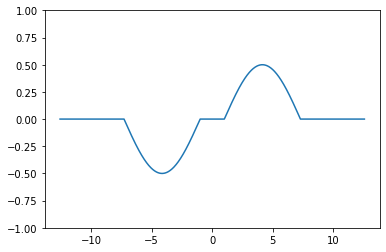

In [40]:
plt.ylim(-1, 1)
plt.plot(xs, y_dots)

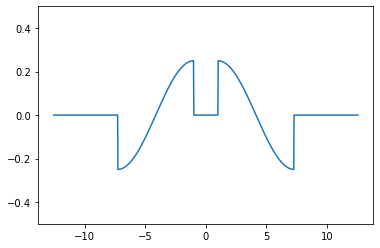

In [43]:
plt.ylim(-0.5, 0.5)
plt.plot(xs, y_dot_dots)

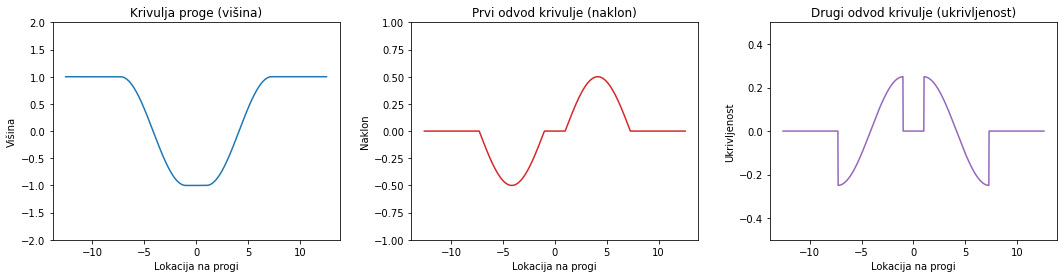

In [68]:
fig = plt.figure()
fig.set_figwidth(18)
fig.subplots_adjust(wspace=0.25)

y_ax = fig.add_subplot(131)
y_ax.plot(xs, ys, 'tab:blue')
y_ax.set_title('Krivulja proge (višina)')
y_ax.set_xlabel('Lokacija na progi')
y_ax.set_ylabel('Višina')
y_ax.set_ylim(-2, 2)

y_dot_ax = fig.add_subplot(132)
y_dot_ax.plot(xs, y_dots, 'tab:red')
y_dot_ax.set_title('Prvi odvod krivulje (naklon)')
y_dot_ax.set_xlabel('Lokacija na progi')
y_dot_ax.set_ylabel('Naklon')
y_dot_ax.set_ylim(-1, 1)

y_dot_dot_ax = fig.add_subplot(133)
y_dot_dot_ax.plot(xs, y_dot_dots, 'tab:purple')
y_dot_dot_ax.set_title('Drugi odvod krivulje (ukrivljenost)')
y_dot_dot_ax.set_xlabel('Lokacija na progi')
y_dot_dot_ax.set_ylabel('Ukrivljenost')
y_dot_dot_ax.set_ylim(-0.5, 0.5)

plt.savefig('uncontinuity.png')

plt.show()